# NNIA Assignment 3

**DEADLINE: 30. 11. 2021 08:00 CET**  
Submissions past the deadline (08.01) will **not** be graded!

- Benedict Schneider 7009917 (BESC0005): 8 hrs 
- Iris Ferazzo 7028674 (IRFE001): 6 hrs
- Lucas Fonseca Lage 7024877 (LUFO00001): 6 hrs

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/l9so16qqvk34hu)**.

* Assignments are to be submitted in a **team of 2/3**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required. 
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2_Name3_id3.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2_Name3_id3.ipynb`. This is **very important** for our internal organization.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>.

# Regressions and Model Evaluation

The objectives of the exercises in this assignment are:

*   to develop an intuitive understanding of a regression model's trainable parameters
*   to have a better understanding of PCA in practice 
*   to familiarize ourselves with how to fit various regression models
*   to learn about various evaluation metrics and their characteristics

Before going ahead with the exercises, recall the following information about Simple and Multiple Linear Regressions from the lecture slides.


*   A *Simple Linear Regression* model predicts a quantitative response $y$ given a single predictor variable $x$ using the best fitting line $y \approx mx + b$ for the observed data.

*   In *Multiple Linear Regression*, the model predicts a quantitative response $y$ given multiple predictor variables by fitting a model $y \approx w_{0} +w_{1}x_{1} + w_{2}x_{2} +... + w_{n}x_{n}$ to the observed data.

*   An ideal model minizes the average squared distance between estimated response of the *i*−th sample $\hat{y}^{train}$ and actual response $y^{train}$ of the *i*−th
sample:


$$MSE_{train} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_{i}^{train} - y_{i}^{train})^{2} $$

*   To minimize $MSE_{train}$, we can set the gradient w.r.t. $w$ to $0$, solving for the weights or parameters $w$:

$$w = (X_{train}^{T}X_{train})^{-1}X_{train}^{T}y_{train}$$

# 1. Linear Regression Manually (2.5 points)

In this task we ask you to solve linear regression manually to gain better understanding of internals of sklearn method, that you are allowed to use for next tasks.

1.1 Implement linear regression manually following the instructions above (1.5 points)

1.2 How does RMSE change depending on the test size? What does it show? (0.5 points)

1.3 What makes this approach inefficient? (0.5 points)

## 1.1 <font color="green">Done</font>

In [1]:
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.linalg import inv
from numpy import array
from sklearn.metrics import mean_squared_error

def manual_linear_regression(test_size: int = 0.1, seed: int = 42):
    # Load the dataset.
    dataset = load_diabetes()

    # The input data are in `dataset.data`, targets are in `dataset.target`.
    #print(dataset.data, dataset.target)
    # data.shape (442,10)
    # target.shape (442,)
    in_data = dataset.data
    target_data = dataset.target
    #print('Input:\n',in_data,'\n')
    #print('Target:\n',target_data,'\n')

    # If you want to learn more about the dataset, you can print some information
    # about it using `print(dataset.DESCR)`.
    #print(dataset.DESCR)

    # DONE: Append a constant feature with value 1 to the end of every input data.
    # Then we do not need to explicitly represent bias - it becomes the last weight.
    bias = np.ones((442,1))
    in_data = np.append(in_data,bias,axis=1) # Shape: (442,11)
    #print(in_data)
    #print(in_data.shape)
    
    # DONE: Split the dataset into a train set and a test set.
    # Use `sklearn.model_selection.train_test_split` method call, passing
    # arguments `test_size, random_state=seed`.
    X_train, X_test, y_train, y_test =train_test_split(in_data,target_data,test_size=test_size,random_state=seed)
    #print('X_train',X_train.shape)
    #print('y_train',y_train.shape)
    #print('X_test',X_test.shape)
    #print('y_test',y_test.shape)

    # DONE: Solve the linear regression using the algorithm from the lecture,
    # explicitly computing the matrix inverse (using `np.linalg.inv`).
    # linear least squares
    w = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    #print('w',w) # Shape (11,)
    
    # DONE: Predict target values on the test set.
    y_hat = X_test.dot(w)
    #print(y_hat.shape)
    
    # DONE: Manually compute root mean square error on the test set predictions.
    #rmse = mean_squared_error(y_test,y_hat,squared=False) # squared=False returns rmse instead of mse
    rmse = np.sqrt(((y_hat-y_test)**2).mean())

    return rmse

manual_linear_regression(), manual_linear_regression(test_size=0.5), manual_linear_regression(test_size=0.9)

/home/lucasfl/anaconda3/envs/nn_22_23/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(52.382356168443884, 54.57653642487501, 59.45829460892983)

### 1.2 <font color="green">Done</font>

Increasing the test size increases the error. This seems intuitive, because while increasing the test size we are simultaneously decreasing the training size. Therefore the model has seen less variance during training for all variables, while at the same time having to predict more data with more variance during testing.

### 1.3 <font color="green">Done</font>

Acquiring the parameters for w directly is computationally expensive and numerically unstable. The predictors (the columns in X) may also not be colinear, otherwise this approach won't work.

## 2 Efficient Linear Regression (3.5 points)

For the other tasks, we will be working with the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) unless otherwise indicated.
Recall that there are 8 features that influence the housing prices in California according to this dataset. 

Although we want to consider as many predictive features as we can in our model, doing so may not necessarily be practical or desirable. Let's consider an assumption that Linear Regression is an algorithm that takes one extra hour to compute for every input feature (it does not but some models may work like this). Therefore, for the sake of efficiency, we want to limit the number of features in the dataset to 3.

## 2.1 Dimensions $8 \rightarrow 3$ (2 points)

To reduce the 8 features to 3, we need to find out which features we should keep and which ones we can ignore. Implement the following two methods to find out:

1. Try all subsets of size 3 of all the features and report which subset results in a Linear Regression model with the lowest MSE. (1 points)
2. Perform PCA to 3 dimensions (components) and fit a Linear Regression using these 3 features. Report the 3 features selected by PCA and the MSE. (0.5 points)
3. Compare the approaches and name one advantage of each over the other method. Comment on any insight you gain about the relationship between housing prices and the selected features in the dataset. (0.5 points)

### 2.1.1 <font color="green">Done</font>

In [2]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from Solution_A3 import lin_reg_subsets
lin_reg_subsets()


# import your function from your .py file here and run this cell when you're done!
# outputs should be MSEs and feature names

(['MedInc', 'HouseAge', 'AveRooms'], 0.6496608827746702)
(['MedInc', 'HouseAge', 'AveBedrms'], 0.6534321198005494)
(['MedInc', 'HouseAge', 'Population'], 0.6524644655188571)
(['MedInc', 'HouseAge', 'AveOccup'], 0.6515442973231507)
(['MedInc', 'HouseAge', 'Latitude'], 0.6428821991178675)
(['MedInc', 'HouseAge', 'Longitude'], 0.6533445563317436)
(['MedInc', 'AveRooms', 'AveBedrms'], 0.6541749417574403)
(['MedInc', 'AveRooms', 'Population'], 0.6916413203415843)
(['MedInc', 'AveRooms', 'AveOccup'], 0.6913124252392123)
(['MedInc', 'AveRooms', 'Latitude'], 0.6847831073780369)
(['MedInc', 'AveRooms', 'Longitude'], 0.6913296359470076)
(['MedInc', 'AveBedrms', 'Population'], 0.7000429369768141)
(['MedInc', 'AveBedrms', 'AveOccup'], 0.6993184146572058)
(['MedInc', 'AveBedrms', 'Latitude'], 0.6904532907506266)
(['MedInc', 'AveBedrms', 'Longitude'], 0.6994333086808937)
(['MedInc', 'Population', 'AveOccup'], 0.6984774384996096)
(['MedInc', 'Population', 'Latitude'], 0.6885412118288013)
(['MedInc', 

### 2.1.2 <font color="green">Done</font>

In [3]:
from Solution_A3 import house_pca_reg

house_pca_reg()

# import your function from your .py file here and run this cell when you're done!
# outputs should be MSE and feature names

(['PC 1 Latitude', 'PC 2 AveRooms', 'PC 3 Population'], 1.292976034615333)


### 2.1.3 <font color="green">Done</font>

One advantage of the subset approach over PCA is, that we get a much lower error (0.55 compared to 1.29). Moreover, we retain the original features, which are human-readable and explainable. The disadvantage however is, that we need to test all possible subset combinations of 3 features here to find the minimal error. For 8 variables, we have to test for 56 combinations, for 9 variables there are already 84 combinations, so this number grows very fast. PCA on the other hand remains computationally feasible. But the principal components that are extracted are difficult to interpret. Our approach here in naming the components was to select the strongest correlation with all of the 8 features.

Interestingly, the first principal component has the strongest relationship to the variable "Latitude", which is also part of the subset that produced the minimal error value.

One interesting insight from the analysis and the different methods used is the fact that the set of features with the lowest RMSE for linear regression had Latitude and Longitude. Meanwhile, between both those geographic features, PCA considered only Latitude as a relevant feature. Which is intuitive, for a "tall" and "thin" state such as california to have "latitude" as more meaningful.

## 2.2 Dimensions $8 \rightarrow 1$ (1.5 points)

Having to visualize the data across multiple dimensions can be cumbsersome. Let's perform the same task as in 2.1 but this time consider only one feature (both a subset of the 8 features and PCA with 1 component). This way it will be easier to visualize the relationaship of your predictive and target variables. Of course, you still want to select the feature that will result in the best performing model.

Your output should include:

1.   The respective MSEs (only the lowest MSE for the subset is fine.)
2.   Make [a scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) of the data with prices on the $y$ axis and the single feature/principal component on the $x$ axis. In the plot, also include a line as defined by the Linear Regression. (Make sure you don't forget to set the correct slope and y-intercept (constant)).

Subset MSE:  0.7011311502929526 



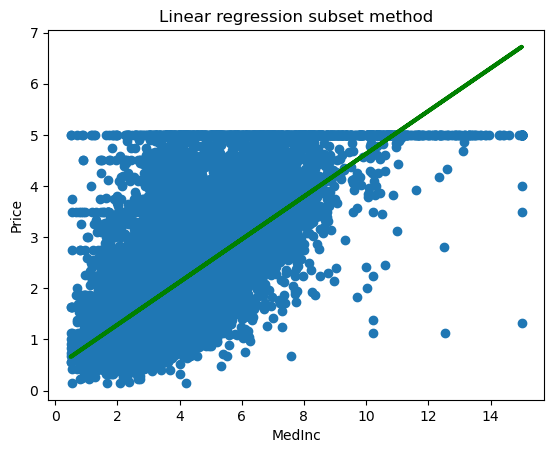

PCA MSE:  1.3299439787512721 



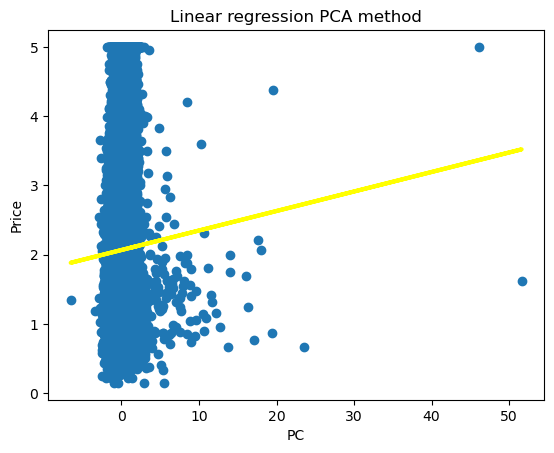

In [4]:
#### DONE ####

from Solution_A3 import subset_PCA_1dim

subset_PCA_1dim()
# import your function from your .py file here and run this cell when you're done!
# outputs should be the MSEs, feauture names, and plots (make sure to label your plots!)

## 3 Manual Regression (4 points)

Now that you are a bit more familiar with the data and the features. This exercise aims to develop some intuition behind regressions by manually adjusting the parameters (coefficients and intercept) in the model. The functions below all perform regression (predicting a real value) but they are far from perfect. Your goal is to improve the four functions from the initial ones in the `code cells` as follows:

1. `hand_base` should serve as a baseline. The constraint is that it should only return a *single (constant) number* for all values. In other words, this is a model with no adjustable parameters. However, for the dataset there exists a unique value that minimizes the Mean Squared Error (MSE). Which one is it? (0.5 points) 
2. `hand_linear` should be a reasonable *linear* function that utilizes the input feature(s). Note that it should be strictly linear, that is in the form $\sum \lambda_i x_i+\lambda_{const}$ where $\lambda_k$ and $\lambda_{const}$ are the coefficients and intercept that you can estimate from the given data by *trial and error*. Your estimates should be reasonable, i.e. definitely better than `hand_base`. Do this exercise before proceeding to the next function where you will obtain the coefficients and intercepts from fitting a Linear Regression model using *sklearn*. We will award full points based on any justified solution that's better than `hand_base`. Make sure that you read what the features mean and argue why you chose the specific formula. (1 point) (Note: we are *not* asking you to compute the coefficients and intercept, but rather play around with adjusting the coefficients and intercept manually to arrive at your best estimate.)
3. `auto_linear`, obtain the coefficients and intercept from fitting a Linear Regression model using `sklearn`.
(Consult [sklearn Linear Regression Documention](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on how to obtain the model's coefficients and intercept.) (1 point)

4. `hand_complex` does not have any restriction on the content of the function. It can contain polynomial relationships (e.g. `x[0]*x[0]`), `if-else` statements, etc.) Now that you have both your hand crafted model and the one from `sklearn`, improve upon either of the models (or you can start with the parameters in the `auto_linear` model) so that the performance of the `hand_complex` is better than `auto_linear`.
What are the disadvantages of this more complex approach apart from the difficulty of creating it? (Hint: think about unseen data.)

Always comment on what led you to select the specific values.

## 3 <font color="green">Done</font>

Modify the functions in the `code cell` below.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Features ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
train_mse:  0.6536319572710421
coefs:  [0.43169191 0.01744134]
intercept:  -0.10189032759084604


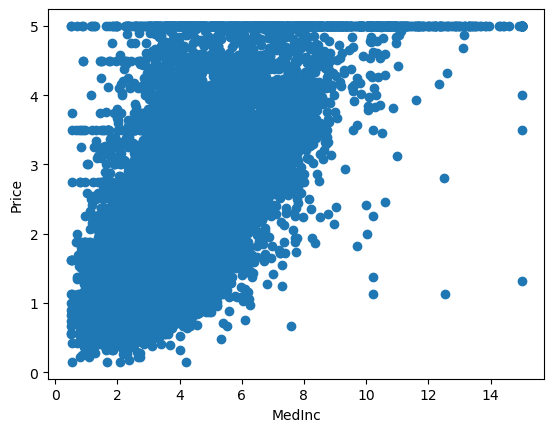

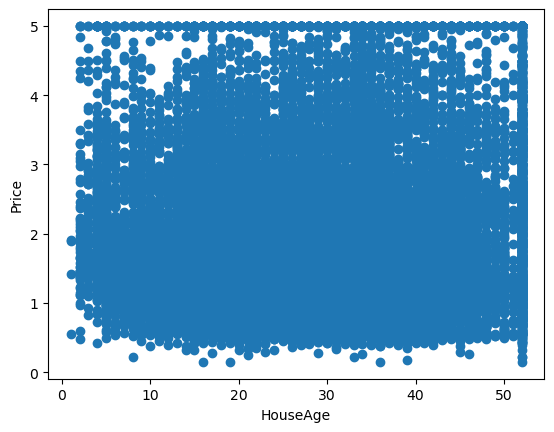

MSE Hand-Base: 1.33
MSE Hand-Linear: 1.32
MSE Auto-LR: 0.65
MSE Hand-Complex: 20.43


In [5]:
%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def mse(y,yhat):
    return mean_squared_error(y,yhat)

#print(housing)
housing_x = housing.data
housing_y = housing.target


print("Features", housing.feature_names)

# x[0]: median income
# x[1]: median house age

def hand_base(_x):
  # DONE: choose better single value
  return 2.1

def hand_linear(x):
  # DONE: make me better but only linearly
  return 0.2*x[0]-0.0402*x[1]+2.6

# DONE:
# 1. Fit LinearRegression
housing_x0x1 = np.take(housing_x,[0,1],axis=1) # only use first two feature for regression
lin_regressor = LinearRegression()
lin_regressor.fit(housing_x0x1,housing_y)
housing_yhat = lin_regressor.predict(housing_x0x1)

# 2. Report training MSE
train_mse = mse(housing_y,housing_yhat)
print('train_mse: ',train_mse)

# 3. Examine the coefficients and intercept and use them for the `auto_linear` function
# <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>
coefs = lin_regressor.coef_
print('coefs: ',coefs)
intercept = lin_regressor.intercept_
print('intercept: ',intercept)

def auto_linear(x):
 # DONE: use coefficients from your linear regression
 return coefs[0]*x[0]+coefs[1]*x[1]+intercept

# Trying to get some insights on the data for hand_complex
x0 = np.take(housing_x0x1,[0],axis=1)
x1 = np.take(housing_x0x1,[1],axis=1)

plt.scatter(x0,housing_y)
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.show()
plt.scatter(x1,housing_y)
plt.xlabel('HouseAge')
plt.ylabel('Price')
plt.show()


def hand_complex(x):
  # TODO: make me better than the auto_linear function
  if x[0] < 0.5:
    return 0.1*x[1]
  else:
    return 0.2*x[1]

print(f"MSE Hand-Base: {mse(housing_y, [hand_base(x) for x in housing_x]):.2f}")
print(f"MSE Hand-Linear: {mse(housing_y, [hand_linear(x) for x in housing_x]):.2f}")
print(f"MSE Auto-LR: {mse(housing_y, [auto_linear(x) for x in housing_x]):.2f}")
print(f"MSE Hand-Complex: {mse(housing_y, [hand_complex(x) for x in housing_x]):.2f}")

## 3 comment

hand_base:
- increase by integer steps of 1
- error starts to decrease but increases after 2
- Finding float between 2 and 3
- error for 2.1 smaller than for 2.0, but increases again at 2.2 -> pick 2.1

hand_linear:
- start to adjust intercept, same strategy as with hand_base
- observation: positive intercept decreases error
- increasing the intercept to 8.6 (trial & error) decreases error, smaller or larger increases again
- picking +8.6 for intercept
- same strategy for x0 and x1 coefficient
- slope for x0 should be positive, since increase in median income should increase price
- slope for x1 should be negative, since increase in median age should decrease price
- from there on basically carefully decreasing the intercept as long as error decreases
- if no improvement on intercept can be made, carefully increase x0 and decrease x1 until error doesn't decrease
- then decrease intercept again etc...

auto_linear:
- here we have to fit the model on a subset of the data, because if we fit it to the data with all variables, the mse on the formula using only x[0] and x[1] will be terrible

hand_complex:
- we were not sure how to approach this problem
- visualizing the x[0] and x[1] variables each with y, we could observe that for an increase in x[0] there also seems to be an increase in y but for x[1] there seems to be not pattern at all

# Bonus. Polynomial Regression and Overfitting (1 point):

Find out how incorporating more features affects our model on the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

1. Transform the feature space using polynomial features: <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html> (hint: make use of the Pipeline class) and run a regression model on top of it. Use degrees 1, 2, 3 and 4. 

2. Make a scatter plot with polynomial degree on the x-axis and training MSE on the y axis. What is an essential caveat to expanding the original feature space like this? (Hint: Think of unseen data again.)

## Bonus: <font color="red">To Do</font>


In [6]:
%load_ext autoreload
%autoreload 2
  
# from solution import ....
# import your function from your .py file here and run this cell when you're done!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
